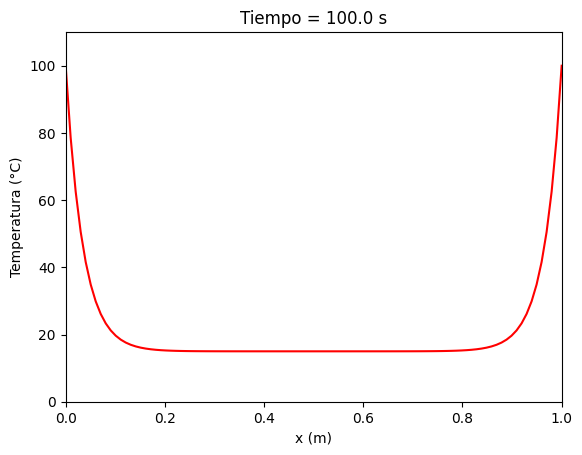

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
from IPython.display import HTML

# Parámetros del problema
alpha = 0.00012       # difusividad térmica (m²/s)
L = 1.0               # longitud de la barra (m)
T_amb = 15            # temperatura ambiente (°C)
T_izq = 100           # temperatura fija en el extremo izquierdo
T_der = 100           # temperatura fija en el extremo derecho
T_ini = 20            # temperatura inicial en el interior
perdida = 0.1         # coeficiente de pérdida de calor al ambiente

# Discretización
Nx = 100
dx = L / (Nx - 1)
dt = 0.1              # paso de tiempo
T_total = 100         # duración total (s)
Nt = int(T_total / dt)

# Verificación de estabilidad
lambda_ = alpha * dt / dx**2
if lambda_ > 0.5:
    raise ValueError(f"λ = {lambda_:.3f} > 0.5 → reduce dt o aumenta Nx")

# Malla y condición inicial
x = np.linspace(0, L, Nx)
T = np.ones(Nx) * T_ini
T[0] = T_izq
T[-1] = T_der

# Guardar evolución
T_history = [T.copy()]
for _ in range(Nt):
    T_new = T.copy()
    for i in range(1, Nx - 1):
        diffusion = alpha * (T[i+1] - 2*T[i] + T[i-1]) / dx**2
        loss = -perdida * (T[i] - T_amb)
        T_new[i] = T[i] + dt * (diffusion + loss)
    T_new[0] = T_izq
    T_new[-1] = T_der
    T = T_new.copy()
    T_history.append(T.copy())

# Crear animación
fig, ax = plt.subplots()
line, = ax.plot(x, T_history[0], color="red")
ax.set_xlim(0, L)
ax.set_ylim(0, max(T_izq, T_ini) + 10)
ax.set_xlabel("x (m)")
ax.set_ylabel("Temperatura (°C)")
title = ax.set_title("Distribución de temperatura")

def update(frame):
    line.set_ydata(T_history[frame])
    title.set_text(f"Tiempo = {frame * dt:.1f} s")
    return line, title

ani = FuncAnimation(fig, update, frames=range(0, len(T_history), 5), interval=40, blit=True)

# Mostrar animación en Jupyter
HTML(ani.to_jshtml())